# Stanford CME 241 (Winter 2025) - Assignment 3

**Due: Sunday, February 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/my-username/my-repo/assignment-file-name.ipynb

*Group members (replace below names with people in your group):* 
- Benjamin Zaidel
- Ohm Patel
- Stephen Li

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

## Question 1: Milk Vendor Optimization Problem (Led by ______)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give you the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk you carry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer

<span style="color:red">
To derive the FOC of $g(S)$, we must take the derivative with respect to $S$.
$$
g'(S) = p*g_1'(S) + h*g_2'(S)
$$

First take derivative of $g_1'(s)$:
$$
g_1'(S) = \frac{d}{dS} \Bigg[ \int_{S}^{\infty} (x - S) \cdot f(x) \, dx \Bigg]
$$
$$
g_1'(S) = \frac{d}{dS} \Bigg[ \int_{S}^{\infty} xf(x) dx - S\int_{S}^{\infty} f(x)dx \Bigg]
$$
$$
g_1'(S) = \frac{d}{dS} \int_{S}^{\infty} xf(x) dx - \frac{d}{dS} \Bigg[ S\int_{S}^{\infty} f(x) dx \Bigg]
$$
Using the Fundamental Theorem of Calculus,
$$
\frac{d}{dS} \int_{S}^{\infty} xf(x) dx = -Sf(S)
$$
$$
\frac{d}{dS} \Bigg[ S\int_{S}^{\infty} f(x) dx \Bigg] = \int_{S}^{\infty} f(x) dx + S \cdot \frac{d}{dS} \int_{S}^{\infty} f(x) dx = \int_{S}^{\infty} f(x) dx - Sf(S)
$$
Thus,
$$
g_1'(S) = -Sf(S) - \Bigg[ \int_{S}^{\infty} f(x) dx - Sf(S)  \Bigg]
$$
$$
g_1'(S) = - \int_{S}^{\infty} f(x) dx
$$
Let $f(x) = \frac{d}{dS} F(x)$:
$$
g_1'(S) = - [1 - F(S)] = -1 + F(S)
$$
</span>

<span style="color:red">
Now, derive the derivative for $g_2(S)$:
    
$$
g_2'(S) = \frac{d}{dS} \Bigg[ S\int_{-\infty}^{S} f(x) dx - \int_{-\infty}^{S} xf(x) dx \Bigg]
$$ 
    
$$
g_2'(S) = \frac{d}{dS} \Bigg[ S\int_{-\infty}^{S} f(x) dx \Bigg] - \frac{d}{dS} \int_{-\infty}^{S} xf(x) dx
$$

$$
\frac{d}{dS} \Bigg[ S\int_{-\infty}^{S} f(x) dx \Bigg] = \frac{d}{dS}S \cdot F(S) \text{ , by def. of cdf}
$$
$$
\frac{d}{dS}S \cdot F(S) = F(S) + Sf(S)
$$

$$
\frac{d}{dS} \int_{-\infty}^{S} xf(x) dx = Sf(S)
$$

Thus,
$$
g_2'(S) = F(S) + Sf(S) - Sf(S) = F(S)
$$

Plugging back into $g'(S)$:

$$
g'(S) = p \cdot (-1 + F(S)) + h \cdot F(S)
$$

$$
g'(S) = -p + pF(S) hF(S) = -p + F(S) (p + h) = 0
$$
Solve for F(S), so the FOC is:
$$
F(S^*) = \frac{p}{p+h}
$$
Solving for $S^*$:
$$
S* = F^{-1} \Bigg( \frac{p}{p+h} \Bigg) \text{   ,   where } F(S) = \int_{-\infty}^{S} f(x) dx
$$

Interpretation: \
$S*$ represents the optimal supply which is a function of the balance of $p$ and $h$. In the real world, this condition represents the probability the optimal supply covers demand without overstocking or understocking and incurring the associated fees. When $\frac{p}{p+h}$ is large, the cost of understocking is high relative to overstocking. When that fractional is small, the cost of overstocking is high relative to understocking. 

</span>

### Part (B) Answer

<span style="color:red">
    
Derive cdf of $f$,
$$
F(x) = \int_0^x f(x)dx  =   \int_0^x \lambda e^{-\lambda x} dx = \Bigg[ -e^{-\lambda x} \Bigg] = -e^{-\lambda x} + 1 = 1 - e^{-\lambda x}
$$
Plugging in $S^*$ and setting equal to expression for $F(S^*)$:
$$
F(S^*) = 1 - e^{-\lambda S^*} = \frac{p}{p+h}
$$
$$
e^{-\lambda S^*} = 1 - \frac{p}{p+h}
$$
$$
e^{-\lambda S^*} = \frac{h}{p+h}
$$
$$
-\lambda S^* = ln(\frac{h}{p+h})
$$
$$
S^* = -\frac{1}{\lambda} \ln(\frac{h}{p+h})
$$
\
\
\
Now part 2: \
Setting up the integral for $g(S)$: 
$$
g(S) = p \cdot \int_{S}^{\infty} (x - S) \cdot f(x) \, dx + h \cdot \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$
\
If F is the cdf of the normal distribution,
$$
F(S^*) = \frac{p}{p+h}
$$

$$
\Phi \Bigg(\frac{S^* - \mu}{\sigma} \Bigg) = \frac{p}{p+h}
$$

$$
\frac{S^* - \mu}{\sigma} = \Phi^{-1} \Bigg(\frac{p}{p+h}  \Bigg)
$$

$$
S^* = \mu + \sigma \Phi^{-1} \Bigg(\frac{p}{p+h}  \Bigg)
$$

Let's discuss how the integral set up for $g$ related to the cdf of the normal distribution. For $g_1$, integrating $f(x)$ from $S$ to $\infty$ is the same as $1 - F(S)$, or in other words the probability mass greater than $S$. Likewise, for $g_2$, integrating from $-\infty$ to $S$ is the same as $F(S)$, or in other words the probability mass less than $S$. This shows that these integrals can be represented by taking normal distribution cdfs. \
\
Interpretation for $\mu$ and $\sigma$: \
Shifts in $\mu$ shift the demand in the same direction. An increase in $\mu$ will increase demand and a decrease in $\mu$ will decrease demand. \
Increase in $\sigma$ will make the demand more variable. An increase in $\sigma$ thus has an influence on $S^*$ dependent on $p$ and $h$. If $p$ is higher, so understocking is relatively high, then the inverse of $\Phi$ applied to the $p, h$ ratio will be positive, and thus increase $S^*$. If $h$, overstocking fee, is relatively large, that inverse $\Phi$ expression can be negative or very small, thus not shifting $S^*$ much, and potentially even shifting down to a lower value to avoid overstocking.

</span>

### Part (C) Answer

<span style="color:red">
The strike price in this case is represented by $S$, the supply. The underlying asset is $x$, the demand. \
\
The $g_1$ represents a call option because the call payoff is $\max(x - S, 0 )$, which is similar to the structure $g_1$. \
The $g_2$ represents a put option because the put payoff is $\max(S - x, 0)$, which is similar to the structure of $g_2$. \
$p$ represents the cost associated with call option striking, because it's the cost incurred if demand exceeds supply. Similarly $h$ represents the cost associated with a put option striking, because it's the cost incurred if supply exceeds demand. \
If we frame this problem as a portfolio of short calls and short puts, with p and h as costs associated with those contracts, minimizing loss from this portfolio will be the same problem as minimizing expected cost $g$. Using the same approach as the milk vendor problem, we find the same condition of $S^*$ solving for optimal strike price to put this short straddle strategy on.
$$
$$

</span>

### Part (D) Answer

In [ ]:
'''
fill in the code below, and then run the code in the next cell for the simulation
'''

# simulation parameters
p = 5  # Cost of understocking (per unit)
h = 2  # Cost of overstocking (per unit)
lambda_param = 1.0  # Parameter for exponential distribution

# Probability density function for demand
def demand_pdf(x):
    return lambda_param * np.exp(-lambda_param * x) if x >= 0 else 0

# Cumulative distribution function for demand
def demand_cdf(x):
    return 1 - np.exp(-lambda_param * x) if x >= 0 else 0

# Expected cost function g(S)
def expected_cost(S):
    # g1(S): Understocking cost
    g1 = p * (np.exp(-lambda_param * S) / lambda_param)
    
    # g2(S): Overstocking cost (integral using CDF)
    leftover = S + (1 / lambda_param) * np.exp(-lambda_param * S) - (1 / lambda_param)
    g2 = h * leftover
    
    return g1 + g2

In [ ]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Optimal Bank Cash Management with Risky Investments and Penalties (Led By: _____)

Assume you are the owner of a bank where customers come in randomly every day to make cash deposits and to withdraw cash from their accounts. At the end of each day, you can borrow (from another bank, without transaction costs) any cash amount $y > 0$ at a constant daily interest rate $R$, meaning you will need to pay back a cash amount of $y(1 + R)$ at the end of the next day. Also, at the end of each day, you can invest a portion of your bank’s cash in a risky (high return, high risk) asset. Assume you can change the amount of your investment in the risky asset each day, with no transaction costs (this is your mechanism to turn any amount of cash into risky investment or vice-versa).

A key point here is that once you make a decision to invest a portion of your cash in the risky asset at the end of a day, you will not have access to this invested amount as cash that otherwise could have been made available to customers who come in the next day for withdrawals. More importantly, if the cash amount $c$ in your bank at the start of a day is less than $C$, the banking regulator will make you pay a penalty of $K \cdot \cot\left( \frac{\pi c}{2C} \right)$ (for a given constant $K > 0$).

For convenience, we make the following assumptions:
- Assume that the borrowing and investing is constrained so that we end the day (after borrowing and investing) with positive cash ($c > 0$) and that any amount of regulator penalty can be immediately paid (meaning $c \geq K \cdot \cot\left( \frac{\pi c}{2C} \right)$ when $c \leq C$).
- Assume that the deposit rate customers earn is so small that it can be ignored.
- Assume for convenience that the first half of the day is reserved for only depositing money and the second half of the day is reserved for only withdrawal requests.
- Assume that if you do not have sufficient cash to fulfill a customer withdrawal request, you ask the customer to make the withdrawal request again the next day.
- Assume all quantities are continuous variables.

---

### Part (A): MDP Modeling

Model the bank’s problem as a **Markov Decision Process (MDP)** with the goal of maximizing the **Expected Utility of assets less liabilities** at the end of a $T$-day horizon, conditional on any current situation of assets and liabilities.

1. **State Space**: Define the possible states of the system.
2. **Action Space**: Specify the possible actions available to the bank at each state.
3. **Transition Function**: Describe how the state evolves based on the current state and the chosen action.
4. **Reward Function**: Specify the reward structure that incentivizes optimal behavior.

*Note*: Be very careful with your notation; ensure that every subscript, index, superscript, prime, etc. is properly defined and necessary. There are a lot of variables at play, so everything must be properly defined or points will be deducted.

---

### Part (B): Reinforcement Learning Approach

In a practical setting, we do not know the exact probability distributions of the customer deposits and withdrawals. Neither do we know the exact stochastic process of the risky asset. But assume we have access to a large set of historical data detailing daily customer deposits and withdrawal requests, as well as daily historical market valuations of the risky asset. Assume we also have data on new customers as well as leaving customers (sometimes due to their withdrawal requests not being satisfied promptly).

Describe your approach to solving this problem with **Reinforcement Learning** by using the historical data described above.

1. Specify which **Reinforcement Learning algorithm** you would use, including any customizations for this problem.
2. Provide sufficient detail that will enable a programmer with knowledge of RL to implement your ideas.

*Note*: You are not expected to write any code for this part.

### Part (A) Answer

<span style="color:red">*fill in*</span>

### Part (B) Answer

<span style="color:red">*fill in*</span>

## Question 3: Career Optimization (Led By: Benjamin)

Imagine you live in a world where every job is an hourly-wage job. You have $H$ available hours in a day (for some fixed $H \in \mathbb{Z}^+$), and each morning when you leave your house, you can decide to split those $H$ hours into:

- Hours spent on learning to get better at your current job (call it $l \in \mathbb{Z}_{\geq 0}$),
- Hours spent on searching for another job (call it $s \in \mathbb{Z}_{\geq 0}$), and
- Remaining $H - l - s$ hours spent on actually working on your current job.

If your job currently pays you at an hourly-wage of $w$ dollars, then at the end of that day, you will be given a cash amount of $w \cdot (H - l - s)$ dollars. We assume that any hourly-wage $w$ in our world is an integer in the finite set $\{1, 2, \dots, W\}$ for some fixed $W \in \mathbb{Z}^+$.

Each employer has a wage model such that if you spend $l$ hours on learning on a given day where your hourly-wage was $w$, then the employer sends you an email the next morning with that new day’s hourly-wage of:  
$$\min(w + x, W)$$  
where $x$ is a Poisson random variable with mean $\alpha \cdot l$ for some fixed $\alpha \in \mathbb{R}^+$.

Each morning, with probability $\frac{\beta s}{H}$ for some fixed $\beta \in [0, 1]$, you will receive an email from another employer with a job-offer with hourly-wage of  
$$\min(w + 1, W)$$  
where $w$ was the hourly wage of the job you were on the previous day and $s$ is the number of hours you spent on job-search the previous day.

You read all your emails before you leave your house in the morning. If another job is offered to you and if the hourly-wage of that job is greater than your current employer’s hourly-wage stated in that morning’s email, then you accept the other job. Otherwise, you continue in your current job. Whichever job you decide to do, each morning when you leave your house, you decide how to split the $H$ hours of that day into learning hours, job-searching hours, and working hours.

Your goal is to maximize the **Expected (Discounted) Wages** earned over an infinite horizon (assume you never age and will live infinitely). The daily discount factor is a fixed $0 < \gamma < 1$.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the states, actions, rewards, state-transition probabilities, and discount factor. Be very precise with your notation!!

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (C): Solving for the Optimal Policy

Solve for the **Optimal Value Function** and **Optimal Policy** using **Value Iteration**. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `rl/dynamic_programming.py`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (D): Visualization

Plot a graph of the **Optimal Policy** (or print the optimal policy) for the following configuration:  
$H = 10$, $W = 30$, $\alpha = 0.08$, $\beta = 0.82$, $\gamma = 0.95$.  

Provide an intuitive explanation for this optimal policy.



### Part (A) Answer

<span style="color:red">


## Formal Definition
Consider a finite MDP defined by the tuple $(S, A, P, R, \gamma)$ where:

### State Space
$S = \{1, 2, ..., W\}$ where $W$ is the maximum wage. Each state $s \in S$ represents the current hourly wage.

### Action Space
$A = \{(l,s) \in \mathbb{Z}_+^2 : l + s \leq H\}$ where:
- $l$ represents learning hours
- $s$ represents search hours
- The remaining $H - l - s$ hours are spent working

### Reward Function
$R: S \times A \times S \to \mathbb{R}$ defined as:

For any current state $w$, action $(l,s)$, and next state $w'$:

$$
R(w,(l,s),w') = w \cdot (H - l - s)
$$

### Transition Probabilities
$P: S \times A \times S \to [0,1]$ defined as follows for current wage $w$ and action $(l,s)$:

1. For $w' < w$:
   $$
   P(w' | w, (l,s)) = 0
   $$

2. For $w' = w < W$:
   $$
   P(w' | w, (l,s)) = e^{-\alpha l} (1 - \beta s / H)
   $$

3. For $w' = w = W$:
   $$
   P(w' | w, (l,s)) = 1
   $$

4. For $w' = w+1 < W$:
   $$
   P(w' | w, (l,s)) = \left( \beta s / H \right) e^{-\alpha l} + \left(1 - \beta s / H\right) \alpha l e^{-\alpha l}
   $$

5. For $w' = W$ and $w = W-1$:
   $$
   P(w' | w, (l,s)) = \left( \beta s / H \right) e^{-\alpha l} + \left(1 - \beta s / H\right) (1 - e^{-\alpha l})
   $$

6. For $w' = w+x < W$ where $x > 1$:
   $$
   P(w' | w, (l,s)) = \frac{(\alpha l)^x e^{-\alpha l}}{x!}
   $$

7. For $w' = W$ and $w < W-1$:
   $$
   P(w' | w, (l,s)) = 1 - \sum_{k=0}^{W-w-1} \frac{(\alpha l)^k e^{-\alpha l}}{k!}
   $$

### Discount Factor
$\gamma \in (0,1)$


</span>

### Part (B) Answer

In [4]:
import sys
sys.path.append("/Users/benjaminzaidel/Desktop//RL-book/")
import math
from collections import defaultdict
from rl.distribution import Categorical, FiniteDistribution
from rl.markov_decision_process import FiniteMarkovDecisionProcess


In [11]:

def generate_allowed_actions(H: int):
    """
    Allowed actions are all (l,s) in Z_+^2 with l + s <= H.
    """
    actions = []
    for l in range(H + 1):
        for s in range(H + 1 - l):
            actions.append((l, s))
    return actions

def wage_mdp_mapping(W: int, H: int, alpha: float, beta: float) -> dict:
    """
    Create the mapping for the wage MDP.
    
    S = {1, 2, ..., W}
    Nonterminal states: 1,2,...,W-1 (wage W is terminal).
    
    For each nonterminal wage w and each allowed action (l,s), we define the
    finite distribution over (next_wage, reward) pairs according to:
    
      -- For w' = w:
             P = exp(-α l) (1 - β s/H)
      
      -- For w < W-1, for w' = w+1:
             P = (β s/H) exp(-α l) + (1 - β s/H)(α l exp(-α l))
      
      -- For w < W-1, for w' = w+x with x = 2,3,...,W-w-1:
             P = ((α l)^x exp(-α l)) / x!
      
      -- For w < W-1, the remaining mass is assigned to w' = W:
             P = 1 - [sum of the above pure-Poisson terms: e^{-αl} + αl e^{-αl} + ...]
      
      -- For w = W-1, we “cap” the outcome so that:
             P(W-1) = exp(-αl)(1 - β s/H)
             P(W)   = 1 - exp(-αl)(1 - β s/H)
    
    The instantaneous reward is: w * (H - l - s)
    """
    mapping = {}
    actions = generate_allowed_actions(H)
    
    for w in range(1, W):  # only nonterminal wages
        action_map = {}
        for (l, s) in actions:
            lam = alpha * l
            base = math.exp(-lam)
            # The reward earned in the current hour depends on the hours worked.
            reward = w * (H - l - s)
            outcomes = {}
            if w == W - 1:
                # For the highest nonterminal wage state, only two outcomes are allowed:
                # either remain at wage W-1 or “cap” at wage W.
                p_stay = base * (1 - beta * s / H)
                p_increase = 1 - p_stay  # so that total probability equals 1
                outcomes[(w, reward)] = p_stay
                outcomes[(W, reward)] = p_increase
            else:
                # For w < W-1
                # Outcome 1: remain at w.
                p0 = base * (1 - beta * s / H)
                outcomes[(w, reward)] = p0
                # Outcome 2: wage increases by 1.
                p1 = (beta * s / H) * base + (1 - beta * s / H) * (lam * base)
                outcomes[(w + 1, reward)] = p1
                # Outcome 3: wage increases by x for x = 2,3,..., W-w-1.
                sum_poisson = base + lam * base  # pure Poisson mass for k = 0, 1
                for x in range(2, W - w):
                    # if w+x < W then use the Poisson formula
                    if w + x < W:
                        p_x = (lam ** x * base) / math.factorial(x)
                        outcomes[(w + x, reward)] = p_x
                        sum_poisson += p_x
                # Outcome 4: the remaining probability mass goes to wage W (i.e. cap)
                p_cap = 1 - sum_poisson
                outcomes[(W, reward)] = p_cap
            # Wrap the outcome mapping in a Categorical distribution.
            action_map[(l, s)] = Categorical(outcomes)
        mapping[w] = action_map
    return mapping


# Simulation parameters
W = 30      # Maximum wage
H = 10       # Total hours available per period
alpha = 0.08
beta = 0.82

# Create the mapping from state -> action -> finite distribution over (next_state, reward)
mdp_mapping = wage_mdp_mapping(W, H, alpha, beta)

# Instantiate the finite MDP. (Note: state W is not in the keys so it will be Terminal.)
wage_mdp = FiniteMarkovDecisionProcess(mdp_mapping)

# (Optional) Print the MDP to see its transitions:
print(wage_mdp)


From State 1:
  With Action (0, 0):
    To [State 1 and Reward 10.000] with Probability 1.000
    To [State 2 and Reward 10.000] with Probability 0.000
    To [State 3 and Reward 10.000] with Probability 0.000
    To [State 4 and Reward 10.000] with Probability 0.000
    To [State 5 and Reward 10.000] with Probability 0.000
    To [State 6 and Reward 10.000] with Probability 0.000
    To [State 7 and Reward 10.000] with Probability 0.000
    To [State 8 and Reward 10.000] with Probability 0.000
    To [State 9 and Reward 10.000] with Probability 0.000
    To [State 10 and Reward 10.000] with Probability 0.000
    To [State 11 and Reward 10.000] with Probability 0.000
    To [State 12 and Reward 10.000] with Probability 0.000
    To [State 13 and Reward 10.000] with Probability 0.000
    To [State 14 and Reward 10.000] with Probability 0.000
    To [State 15 and Reward 10.000] with Probability 0.000
    To [State 16 and Reward 10.000] with Probability 0.000
    To [State 17 and Reward 1

### Part (C) Answer

In [6]:
from rl.dynamic_programming import value_iteration
from rl.dynamic_programming import value_iteration_result

In [12]:
value_iteration(wage_mdp, gamma=.95,)
value_iteration_result(wage_mdp, gamma=.95,)

({NonTerminal(state=1): 1259.650492622742,
  NonTerminal(state=2): 1340.4150287769173,
  NonTerminal(state=3): 1426.357913842387,
  NonTerminal(state=4): 1517.8111660380023,
  NonTerminal(state=5): 1615.128091467472,
  NonTerminal(state=6): 1718.684649031722,
  NonTerminal(state=7): 1828.8809028830492,
  NonTerminal(state=8): 1946.1425677166949,
  NonTerminal(state=9): 2070.9226507164517,
  NonTerminal(state=10): 2203.703212047008,
  NonTerminal(state=11): 2344.997430859796,
  NonTerminal(state=12): 2495.3513213053984,
  NonTerminal(state=13): 2655.3256532742776,
  NonTerminal(state=14): 2825.6334066075733,
  NonTerminal(state=15): 3006.9962764014304,
  NonTerminal(state=16): 3199.999895219283,
  NonTerminal(state=17): 3399.9998886704875,
  NonTerminal(state=18): 3599.999882121693,
  NonTerminal(state=19): 3799.9998755728984,
  NonTerminal(state=20): 3999.9998690241036,
  NonTerminal(state=21): 4199.999862475308,
  NonTerminal(state=22): 4399.999855926513,
  NonTerminal(state=23): 4599

### Part (D) Answer

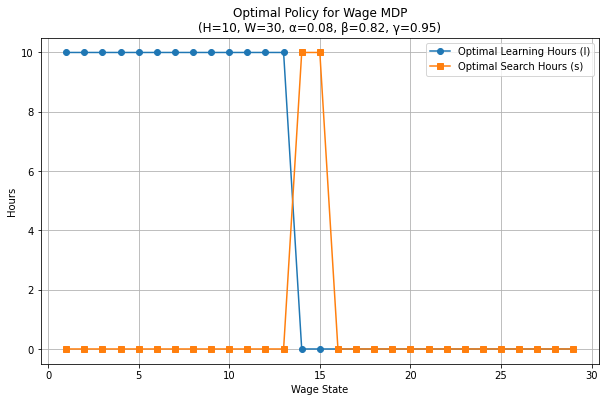

In [18]:
from matplotlib import pyplot as plt

gamma= 0.95
opt_vf, opt_policy = value_iteration_result(wage_mdp, gamma=gamma)

policy_dict = {s.state: opt_policy.act(s).sample() for s in wage_mdp.non_terminal_states}

states = sorted(policy_dict.keys())  # these are wage levels (from 1 to W-1)
learning_hours = [policy_dict[s][0] for s in states]
search_hours = [policy_dict[s][1] for s in states]

# --- Plot the optimal policy ---
plt.figure(figsize=(10, 6))
plt.plot(states, learning_hours, label="Optimal Learning Hours (l)", marker='o')
plt.plot(states, search_hours, label="Optimal Search Hours (s)", marker='s')
plt.xlabel("Wage State")
plt.ylabel("Hours")
plt.title("Optimal Policy for Wage MDP\n(H={}, W={}, α={}, β={}, γ={})".format(H, W, alpha, beta, gamma))
plt.legend()
plt.grid(True)
plt.show()

Low Wages (All Learning):

Low Opportunity Cost: When your wage w is small, the reward you earn from working hours is relatively small (w×work_hours). So giving up work hours to learn does not “cost” you much in foregone wages.
High Future Benefit of Learning: Learning (i.e., increasing αl) raises your chance of jumping to a higher wage, which permanently boosts your earning potential. Thus, at low w, investing heavily in learning pays off in the long run because each wage increase meaningfully increases future rewards.

Higher Wages (All Searching):

Higher Opportunity Cost: Once your wage w is large enough, you lose more immediate reward by spending hours on learning rather than working. In other words, not working (to learn) becomes “expensive” because w is high.
Search Can Yield Big Jumps: Searching (controlled by βs) might give a quicker route to further wage jumps without incurring as much of a “learning cost.” So beyond a certain wage threshold, it becomes more beneficial to spend your “non‐work” hours on searching rather than learning.

Threshold Behavior:
Because of how Poisson‐like transitions (from learning) and search‐based transitions interact, the policy ends up “flipping” at some wage level. Below that level, learning dominates because the cost of not working is low and the upside is large; above that level, searching dominates because additional learning yields diminishing returns and/or a higher cost in lost wages.


## Question 4: Car Sales (Led By: _____)

Imagine you own a car which you need to sell within a finite window of $N$ days. At the beginning of each day, you receive an offer from a dealership which is randomly distributed over the interval $[m, M]$, $0 < m < M$, with a known continuous distribution $Q$ on this support; the offers each day are i.i.d. After receiving an offer, you have to decide immediately whether to accept or reject it. If you reject the offer, it is lost, and you have to pay a parking cost for the car of $c \geq 0$, which you must pay at the end of each day you do not sell the car. After $N$ days, the car has to be sold. The parameters $m$, $M$, and $c$ are all fixed positive real numbers. Your objective is to maximize the sale proceeds.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this problem fully as an **MDP** by specifying the following:
1. **States**: Define the state space
2. **Actions**: Specify the possible actions available to the seller
3. **Rewards**: Define the reward structure
4. **State-Transition Probabilities**: Specify the transition dynamics
5. **Discount Factor**: Indicate the discount factor

Additionally, discuss what particular kind of MDP this is.

---

### Part (B): Analytical Solution

Solve this MDP analytically for the **optimal policy**. Provide a detailed explanation of the steps used to derive the policy and any key conditions or assumptions required (*Note*: this is to be done mathematically, not using code).

---

### Part (C): Special Case Analysis

Consider the case where $c = 0$ and $Q(x) = U_{[m, M]}(x)$ (the uniform distribution on $[m, M]$). Solve for as closed-form a solution of the optimal policy **as possible**. To make this concrete, the functional form of your optimal policy should be explicitly defined but can depend on coefficients that are recursively defined. **You should not have integrals in your solution.**


### Part (A) Answer

<span style="color:red">

MDP Formulation

State Space (S):

- Non-terminal states: $S_{NT} = {(n,o) : n \in {1,\ldots,N}, o \in [m,M]}$
- Terminal state: $S_T = {(0,\cdot)}$
- Full state space: $S = S_{NT} \cup S_T$


Action Space (A):

- For $n > 0$: $A((n,o)) = {\text{accept}, \text{reject}}$
- For $n = 0$: $A((0,\cdot)) = {\text{accept}}$


Reward Function (R):

- For accept action: $R((n,o), \text{accept}) = o$
- For reject action: $R((n,o), \text{reject}) = -c$


Transition Probabilities (P):

- For accept action: $P((0,\cdot)|(n,o), \text{accept}) = 1$
- For reject action (when $n > 1$): $P((n-1,o')|(n,o), \text{reject}) = Q(o')$, where $Q$ is the offer distribution
- At $n = 1$: $P((0,\cdot)|(1,o), \text{reject}) = 1$


Discount Factor: $\gamma = 1$ (finite horizon problem)

This is a special type of MDP known as an optimal stopping problem. It has several interesting characteristics:

- Finite horizon (N days)
- Continuous state space (due to offers being in $[m,M]$)
- Perfect information (current offer is known)
- Deterministic rewards for actions
- The only uncertainty comes from future offers following distribution Q




</span>

### Part (B) Answer

<span style="color:red">

Theorem: The optimal value function $V^*(n,o)$ has a threshold structure where for each $n$, there exists a threshold $k_n$ such that it is optimal to accept offer $o$ if and only if $o \geq k_n$.

Proof: By induction on the number of days remaining $n$.

Base Case $(n = 1)$:
When one day remains, the value function is:
$$V^{(1,o)} = \max{o, -c + \int_m^M o'Q(o')do'}$$
$$\phantom{V^{(1,o)}} = \max{o, -c + \mu}$$
where $\mu$ is the expected value of an offer.

Let $k_1 = -c + \mu$. Then:

If $o \geq k_1$, accepting (value = $o$) is optimal.
If $o < k_1$, rejecting (value = $-c + \mu$) is optimal

Therefore, the threshold structure holds for $n = 1$.

Inductive Hypothesis:

Assume that for some $n \geq 1$, $V^{(n,o)}$ has a threshold structure with threshold $k_n$, meaning:
$V^(n,o) = \max{o, -c + \int_m^M V^*{(n,o')}Q(o')do'}$
and it is optimal to accept if and only if $o \geq k_n$.

Inductive Step:

For $n+1$ days, consider $V^(n+1,o)$. We have:
$V^(n+1,o) = \max{o, -c + \int_m^M V^*{(n,o')}Q(o')do'}$
Let's call the second term (reject value):
$$R = -c + \int_m^M V^*{(n,o')}Q(o')do'$$
By the inductive hypothesis, $V^{(n,o')}$ has a threshold structure, so:
$V^{(n,o')} = o'$ if $o' \geq k_n$
$V^*{(n,o')} = R'$ if $o' < k_n$
where $R'$ is some constant value.

Therefore:

$R = -c + \int_m^{k_{n-1}} R'Q(o')do' + \int_{k_{n-1}}^M o'Q(o')do'$

$R = -c + \int_m^{k_{n-1}} V^*(n-1,o')Q(o')do' + \int_{k_{n-1}}^M o'Q(o')do'$
This $R$ is a constant (not depending on $o$). Therefore:

$V^*(n+1,o) = \max{o, R}$
Let $k_{n+1} = R$. Then:

If $o \geq k_{n+1}$, accepting (value = $o$) is optimal
If $o < k_{n+1}$, rejecting (value = $R$) is optimal

Thus, $V^{*{(n+1,o)}}$ has a threshold structure, completing the induction.



</span>

### Part (C) Answer

<span style="color:red">*fill in*</span>

## Question 5: Constrained Consumption (Led By: Stephen)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in [0, 1]$ when discounting the utility of consumption over any single time period.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A) Answer

<span style="color:red">

Given the fixed policy $c = \theta x$, the resource updates as follows: 
$$
x_0 = x, \quad x_1 = (1 - \theta)x, \quad x_2 = (1 - \theta)^2 x, \quad \dots, \quad x_t = (1 - \theta)^t x.
$$

At a particular time t, the consumption is:

$$c_t = \theta x_t = \theta (1 - \theta)^t x $$

Applying $c_t$ into the utility function at time t we get:

$$
U(c_t) = \frac{1}{1-\gamma} \left( \theta (1 - \theta)^t x \right)^{1-\gamma}
$$

Now apply discounting of the utility by $\beta_t$ and summing it over all the periods which will provide the value function:
$$
V_{\theta}(x) = \sum_{t=0}^{\infty} \beta_t U(c_t)
$$

Sub in the utility into the above equation we get:
$$
V_{\theta}(x) = \sum_{t=0}^{\infty} \beta_t \frac{1}{1-\gamma} \left( \theta (1 - \theta)^t x \right)^{1-\gamma}
$$

Rearrange it as we could see there is a geometric sum that could be applied:
$$
V_{\theta}(x) = \frac{(\theta x)^{1-\gamma}}{1 - \gamma} \sum_{t=0}^{\infty} (\beta_t (1-\theta)^{1-\gamma})^t
$$

The geometric sum could be applied as the expression $(\beta_t (1-\theta)^{1-\gamma})^t$ is always less than 1, so the expression could be represented as:

$$
V_{\theta}(x) = \frac{(\theta x)^{1-\gamma}}{(1 - \gamma) \left( 1 - \beta (1 - \theta)^{1-\gamma} \right)}
$$


</span>

### Part (B) Answer

<span style="color:red">

To maximize $V_{\theta}(x)$, take the first derivative with respect to $\theta$. 

For simplicity of taking the derivative, exclude all terms that do not have $\theta$ this will look like:
$$ 
\frac {\theta^(1 -\gamma)} {1 -\beta (1 - \theta)^{1-\gamma}}
$$

Use the quotient rule to take the derivative of the above expression to obtain:
$$
V'_{\theta}(x) = \frac{(1-\gamma)\theta^{-\gamma} \left( 1 - \beta (1 - \theta)^{1-\gamma} \right)  - \theta^{1-\gamma} \beta (1-\gamma) (1-\theta)^{-\gamma}} {\left( 1 - \beta (1 - \theta)^{1-\gamma} \right)^2} = 0
$$

The above expression could be reduced and simplified from the following steps:

$$
(1 -\gamma)\theta^{-\gamma} ( 1 - \beta (1 - \theta)^{1-\gamma}) - \theta^{1-\gamma}\beta (1 -\gamma) (1 -\theta)^{-\gamma} = 0 
$$

Simplify to:

$$
1 - \beta (1 - \theta)^{1-\gamma} = \theta\beta (1 -\theta)^{-\gamma}  
$$

Simplify to:
$$
(1 -\theta)^{\gamma} (1 - \beta (1 - \theta)^{1-\gamma}) = \theta\beta  
$$

Continue to simplify:
$$
(1 -\theta)^{\gamma} = \beta  
$$

Rearranging in terms of $\theta$, we will obtian $\theta^*$ as:

$$
\theta^* = 1 - \beta^{\frac {1} {\gamma}}  
$$

Hence, the optimal policy is could be represented as:

$$
c^* = \theta^* x = (1 - \beta^{ \frac{1} {\gamma}}) x
$$

</span>

### Part (C) Answer

<span style="color:red">

From part a, we have the expression:
$$
V_{\theta}(x) = \frac{(\theta x)^{1-\gamma}}{(1 - \gamma) \left( 1 - \beta (1 - \theta)^{1-\gamma} \right)}
$$

To determine the optimal value function $V^*(x)$, rewrite the above expression as:
$$
V^*(x) = \frac{(\theta^* x)^{1-\gamma}}{(1 - \gamma) \left( 1 - \beta (1 - \theta^*)^{1-\gamma} \right)}
$$

From part b, we have $\theta^*$ as:
$$
\theta^* = 1 - \beta^{\frac {1} {\gamma}}  
$$

We could simplify the $V^*(x)$ expression by first simplifying the components:

1. Compute $\theta^{* 1- \gamma}$:

$$
\theta^{* 1- \gamma} =  (1 - \beta ^{\frac {1} {\gamma}})^{1 -\gamma}
$$

2. Compute $\beta(1-\theta^*)^{1- \gamma}$:

$$
\beta(1-\theta^*)^{1- \gamma} = \beta(1-(1-\beta^{1/\gamma}))^{1- \gamma} =\beta\beta^{\frac {1 -\gamma} {\gamma}} = \beta^{\frac{1}{\gamma}}
$$

Now sub in 1. and 2. into the $V^*(x)$ expression to get:
$$
V^*(x) = \frac{ x^{(1-\gamma)} (1 - \beta ^{\frac {1} {\gamma}})^{(1 -\gamma)}}{(1 - \gamma) \left( 1 - \beta^{\frac{1}{\gamma}} \right)}
$$

Simplifying the expression we get: 
$$
V^*(x) = \frac{ x^{(1-\gamma)}} {(1 - \gamma) ( 1 - \beta^{\frac{1}{\gamma}} )^\gamma}
$$

</span>

### Part (D) Answer

<span style="color:red">

We want to verify that the following optimal value function from part c:

$$
V^*(x) = \frac{x^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^\gamma}
$$

and the optimal policy from part b:

$$
c^* = \theta^* x = \left( 1 - \beta^{1/\gamma} \right) x
$$

satisfy the Bellman optimality equation:

$$
V^*(x) = \max_{c} \left\{ U(c) + \beta V^*(x - c) \right\}
$$

where the utility function is

$$
U(c) = \frac{c^{1-\gamma}}{1 - \gamma}
$$


The following shows the validation:

First under the optimal policy, we set

$$
c^* = \left( 1 - \beta^{\frac {1} {\gamma}} \right) x
$$

Then the remaining resource is:

$$
x - c^* = x - \left( 1 - \beta^{\frac {1} {\gamma}} \right) x = \beta^{\frac {1} {\gamma}} x
$$


Next compute the term $U(c^*)$:
$$
U(c^*) = \frac{\left( c^* \right)^{1-\gamma}}{1 - \gamma} 
= \frac{ ((1 - \beta^{\frac {1} {\gamma}}) x )^{1-\gamma}}{1 - \gamma} 
= \frac{(1 - \beta^{\frac {1} {\gamma}})^{1-\gamma} x^{1-\gamma}}{1 - \gamma}.
$$


From part c, we have the following:

$$
V^*(x) = \frac{ x^{(1-\gamma)}} {(1 - \gamma) ( 1 - \beta^{\frac{1}{\gamma}} )^\gamma}
$$

We could now compute $V^*(x - c^*) = V^*(\beta^{\frac {1} {\gamma}} x)$ as:

$$
V^*(\beta^{\frac {1} {\gamma}} x) = \frac{ x^{(1-\gamma)} \beta ^{\frac {1 -\gamma} {\gamma}}} {(1 - \gamma) ( 1 - \beta^{\frac{1}{\gamma}} )^\gamma}
$$

Now the second half the bellman optimality equation could be represented as:

$$
\beta V^*(x - c^*) = \frac{ x^{(1-\gamma)} \beta ^{\frac {1} {\gamma}}} {(1 - \gamma) ( 1 - \beta^{\frac{1}{\gamma}} )^\gamma}
$$

With the two terms, we could sum them up which is:

$$
V^*(x) = \underset{U(c^*)}{\underbrace{\frac{(1 - \beta^{\frac {1} {\gamma}})^{1-\gamma} x^{1-\gamma}}{1 - \gamma}}} + 
\underset{\beta V^*(x - c^*)}{\underbrace{\frac{ x^{(1-\gamma)} \beta ^{\frac {1} {\gamma}}} {(1 - \gamma) ( 1 - \beta^{\frac{1}{\gamma}} )^\gamma}}}
$$

The above expression could be simplified as:
$$
U(c^*) + \beta V^*(x - c^*) =
\frac{x^{1-\gamma}}{1 - \gamma} \cdot \frac{1}{(1 - \beta^{1/\gamma})^\gamma} = 
\frac{x^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^\gamma}
$$


As shown, the bellman optimality equation is same as the expression in part C.  

$$
U(c^*) + \beta V^*(x - c^*) = V^*(x)
$$

Thus, the optimal policy $c^*(x) = (1 - \beta^{1/\gamma})x$ 

and the optimal value function:

$$
V^*(x) = \frac{x^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^\gamma}
$$

satisfies the Bellman optimality equation, hence validation completed.

</span>

## Question 6: TD and MC Algorithms (Led By: _____)

In this question, we explore the connection between **Temporal Difference (TD)** and **Monte Carlo (MC)** algorithms.

---

### Part (A): Implementing TD($\lambda$) Prediction Algorithm

Implement the **TD($\lambda$) Prediction algorithm** from scratch in Python code. First, implement it for the **Tabular case**. Next, implement it for the **Function Approximation case**.  

Provide clear and well-commented code for both implementations, and describe any assumptions or simplifications made.

---

### Part (B): Proof of MC Error as Sum of Discounted TD Errors

Prove that the **MC Error** can be written as the sum of discounted TD errors, i.e.,  
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot \big( R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u) \big)
$$

Work this out from scratch, rather than relying on general results from class or the textbook.

---

### Part (C): Code Extension

Extend `RandomWalkMRP` (in [rl/chapter10/random_walk_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter10/random_walk_mrp.py)) to `RandomWalkMRP2D` which is a random walk in 2-D with states $\{i, j) | 0 \leq i \leq B_1, 0 \leq j \leq B_2\}$ with terminal states as $(0, j)$ and $(B_1, j)$ for all $j$, $(i, 0)$ and $(i, B_2)$ for all $i$, and with reward of 0 for all $(0, j)$ and for all $(i, 0)$, reward of 1 for all $(B_1, j)$ and for all $(i, B_2)$, and with discrete probabilities of 4 movements - UP, DOWN, LEFT, RIGHT from any non-terminal state. Analyze the convergence of MC and TD on this `RandomWalkMRP2D` much like how we analyzed it for `RandomWalkMRP`, along with plots of similar graphs.

Only modify the code where the message `fill in` is noted.

### Part (A) Answer

In [ ]:
# fill in with Python code

### Part (B) Answer

<span style="color:red">*fill in*</span>

### Part (C) Answer

In [ ]:
class RandomWalkMRP2D(FiniteMarkovRewardProcess[int]):
    barrier: Tuple[int]
    p: Tuple[float]

    def __init__(
        self,
        barrier: Tuple[int],
        p: Tuple[float]
    ):
        self.barrier = barrier
        self.p = p
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[Tuple[int], Categorical[Tuple[Tuple[int], float]]]:
        '''
        fill in the code below to define the dictionary, d, and then run the code in the next cell for the visualization
        '''
        d: Dict[Tuple[int], Categorical[Tuple[Tuple[int], float]]] = _
        return d

In [ ]:
this_barrier: Tuple[int] = (10, 10)
this_p: Tuple[float] = (0.2, 0.3, 0.25, 0.25)
random_walk: RandomWalkMRP2D = RandomWalkMRP2D(
    barrier=this_barrier,
    p=this_p
)
compare_td_and_mc(
    fmrp=random_walk,
    gamma=1.0,
    mc_episode_length_tol=1e-6,
    num_episodes=3500,
    learning_rates=[(.1, 1e8, .5), (.05, 1e8, .5)],
    initial_vf_dict={s: 0.5 for s in random_walk.non_terminal_states},
    plot_batch=7,
    plot_start=0
)

## Problem 7: Double Q-Learning (Led By: _____)

It is known that **Q-Learning** can suffer from a maximization bias during finite-sample training. In this problem, we consider the following modification to the **Tabular Q-Learning** algorithm called **Double Q-Learning**:

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s, a)$ and $Q_2(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a \big( Q_1(s_t, a) + Q_2(s_t, a) \big)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; **if** with 0.5 probability **then**  
&emsp;&emsp;&emsp; $Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t) + \alpha \big( r_t + \gamma Q_2(s_{t+1}, \arg \max_a Q_2(s_{t+1}, a)) - Q_1(s_t, a_t) \big)$  

&emsp;&emsp; **else**  
&emsp;&emsp;&emsp; $Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t) + \alpha \big( r_t + \gamma Q_1(s_{t+1}, \arg \max_a Q_1(s_{t+1}, a)) - Q_2(s_t, a_t) \big)$  

&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** estimate of $Q$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a Q(s_t, a)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; $Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \big( r_t + \gamma Q(s_{t+1}, \arg \max_a Q(s_{t+1}, a)) - Q(s_t, a_t) \big)$  
&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** $Q$

---

### Instructions:
The code skeleton for this problem is provided below. Implement the following functions: `double_q_learning` and `q_learning`. Once implemented, you can run the code. You will get a graph of the estimated q-value plotted against the episode number. Comment on your observations, and explain the benefits/drawbacks of the double q-learning algorithm for general MDPs.

In [2]:
import sys
sys.path.append("/Users/benjaminzaidel/Desktop//RL-book/")

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [13]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

In [23]:
# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q2,
         otherwise update Q2 using next-action chosen by max of Q1.
    """
    Q1 = TabularQValueFunctionApprox[S, A]()
    Q2 = TabularQValueFunctionApprox[S, A]()
    epsilon = 0.1

    while True:
        s = states.sample()
        while isinstance(s, NonTerminal):
            possible_actions = [a for a in mdp.actions(s)]
            if random.random() < epsilon:
                a = random.choice(possible_actions)
            else:
                a = max(possible_actions, key=lambda a: Q1((s, a)) + Q2((s, a)))
            s_next, r = mdp.step(s, a).sample()
            if random.random() < 0.5:
                a_next = max(mdp.actions(s_next), key=lambda a: Q1((s_next, a)))
                Q1.update((s, a), r + gamma * Q2((s_next, a_next)))
                yield Q1
            elif isinstance(s_next, Terminal):
                Q1.update((s, a), r)
                Q2.update((s, a), r)
            else:
                a_next = max(mdp.actions(s_next), key=lambda a: Q2((s_next, a)))
                Q2.update((s, a), r + gamma * Q1((s_next, a_next)))
                yield Q2
            s = s_next
    pass

In [19]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Standard Q-Learning:
      1) Keep one Q table
      2) Epsilon-greedy wrt that table
      3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
    """
    Q = TabularQValueFunctionApprox[S, A]()
    epsilon = 0.1

    while True:
      s = states.sample()
      while isinstance(s, NonTerminal):
         possible_actions = [a for a in mdp.actions(s)]
         if random.random() < epsilon:
            a = random.choice(possible_actions)
         else:
            a = max(possible_actions, key=lambda a: Q((s, a)))
         s_next, r = mdp.step(s, a).sample()
         if isinstance(s_next,Terminal):
            Q.update((s, a), r)
         else:
            optimal_action = max(mdp.actions(s_next), key=lambda a: Q((s_next, a)))
            Q.update((s, a), r + gamma * Q((s_next, optimal_action)))
            yield Q
         s = s_next

    pass

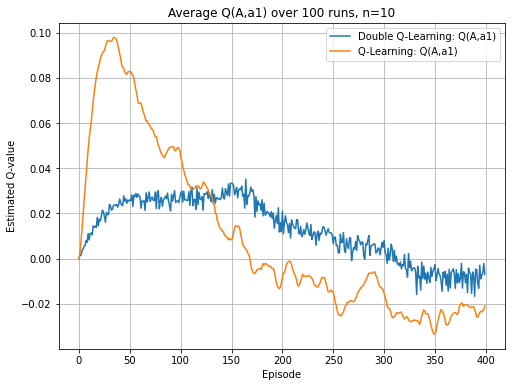

In [24]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

## Problem 8: Dice Rolling Game (Led By: Stephen)

Consider the following dice game. You start with $N$ $K$-sided dice on the table, and no dice in your hand. The values on the dice faces are $\{1, 2, ..., K\}$. While you have dice remaining on the table, the game proceeds as follows:

1. **Roll all the dice on the table.**  
2. **Select a nonempty subset of the dice on the table to move to your hand.**  
   - The dice you move to your hand keep the value which they were just rolled.  
   - For example, if your hand is $\{1, 3\}$ and you roll $\{2, 2, 3, 4\}$ on the table, and you decide to move the dice with $3$ and $4$ to your hand, you will now have $\{1, 3, 3, 4\}$ in your hand.

The game ends when you have no dice on the table left to roll. Your score for the game is then calculated as the sum of the values of dice in your hand **if you have at least $C$ 1’s in your hand**, and zero otherwise. For example:
- For $N = K = 4$ and $C = 2$, the score corresponding to a hand containing $\{1, 3, 1, 4\}$ would be $9$, while the score corresponding to a hand containing $\{4, 1, 3, 4\}$ would be $0$.

Your goal is to **maximize your score** at the end of the game.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the following:
- **States**
- **Actions**
- **Rewards**
- **State-Transition Probabilities**
- **Discount Factor**

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you). You should implement this for the **general case**, specifically your MDP implementation should take as parameters $N$, $K$, $C$.

For $N = 6$, $K = 4$, $C = 1$, use the `dynamic_programming.py` library (or your own code if you chose not to implement it within the class library) to solve for the **optimal value function**, and present the following values:

1. The **expected score** of the game playing optimally, calculated using your code, not analytically.
2. The **optimal action** when rolling $\{1, 2, 2, 3, 3, 4\}$ on the first roll.

### Part (A) Answer

<span style="color:red">

### State Space:
$$S = (n, \mathbf{h})$$

where:
n $\in {0, 1, 2, ..., N}$ is the number of dice remaininig on the table.

The terminal state is where n = 0, as that indicates the game ends which is defined as:

$$s = (0, \mathbf{h})$$

h = ($h_1, h_2, ..., h_K $) represents the counts of dice you have "taken" so far (For exmaple, $h_i$ is the number of dice with face i that are on your hand). Also, the range of $h_i$ is between 0 and K.

### Action:
For each nonterminal state S, the game proceeds in two steps.

1. The dice roll counts on the table represented as a vector, x:

$$\mathbf{x} = (x_1, x_2, ... , x_K)$$

2. Action: A selection of a nonempty subset of dice from the outcome $\mathbf{x}$ to add to your hand h. We define the action as a vector $\mathbf{a}$:

$$\mathbf{a} = (a_1, a_2, ... , a_K) $$

for each index $i$ in $\mathbf{a}$ it follows: 

$$0 \leq a_i \leq x_i \quad \text{and} \quad \sum_{i=1}^K a_i \geq 1$$

Thus the new state becomes:
$$
s' = \left( n - \sum_{i=1}^{K} a_i, \ \mathbf{h_i} + \mathbf{a_i} \right).
$$


### Rewards:
The rules will consider the score if the number of 1's on hand exceeds C. The score is calculated when the game ends. In this case, the reward will be considered at terminal state $s = (0, h)$ and will receive reward based on the dice in your hand as determined by: 

$$
R(s) =
\begin{cases}
\sum\limits_{i=1}^{K} i h_i, & \text{if } h_1 \geq C, \\
0, & \text{if } h_1 < C.
\end{cases}
$$


### State Transition Probability:
The state transition probaility for a specific turn will follow a multinomial distribution for rolling n dice where $x_i$ are the counts for each face of the die as follows:
$$
P(s' \mid s, a_i) = 
\begin{cases}
\frac{n!}{x_1! \cdots x_K!} \left( \frac{1}{K} \right)^n, 
& \quad \text{if } h'_i = h_i + a_i \text{ and } x'_i = x_i - a_i, \\
0, & \quad \text{otherwise}.
\end{cases}
$$

The action selection is probabilistic so the overall transition would follow:

$$
P(s' \mid s) = \sum_{a} \pi(a \mid s, x) P(s' \mid s, a).
$$

Where $\pi(a \mid s, x)$ is the probability that action a is selected given state s and roll outcome x.

### Discount factor: 
Reward only received at end of game, the discount factor is set to 
$\gamma$ = 1

</span>

### Part (B) Answer

In [ ]:
import math
import itertools
from collections import defaultdict

# Imports from code base:
from rl.distribution import Categorical
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.dynamic_programming import value_iteration_result
from rl.markov_process import NonTerminal

# Game Parameters
N = 6 
K = 4 
C = 1 

# Helper Functions
def generate_tuples(total, length):
    """Generate all tuples of nonnegative integers of given length that sum to total."""
    if length == 1:
        yield (total,)
    else:
        for i in range(total+1):
            for tail in generate_tuples(total - i, length - 1):
                yield (i,) + tail

def generate_roll_outcomes(n, K):
    """Generate all outcomes x (tuple of length K) with nonnegative integers summing to n."""
    return list(generate_tuples(n, K))

def outcome_probability(x, n, K):
    """Probability of roll outcome x when rolling n fair K-sided dice. Follows the multinomial distribution"""
    prob = math.factorial(n)
    for xi in x:
        prob /= math.factorial(xi)
    prob *= (1/K)**n
    return prob

def terminal_reward(hand):
    """Compute terminal reward given hand (a tuple of counts for faces 1,...,K)."""
    if hand[0] >= C:
        return sum((i+1)*hand[i] for i in range(K))
    else:
        return 0

def add_tuples(t1, t2):
    """Elementwise addition of two tuples of the same length."""
    return tuple(a + b for a, b in zip(t1, t2))

def roll_count(rolls):
    """Convert dice rolls into counts 
    (index represents the dice value and tuple stores the counts)
      and return as tuple"""
    updated_roll = {}
    counts = []
    for roll in rolls:
        if roll not in updated_roll:
            updated_roll[roll] = 0
        updated_roll[roll] +=1

    for _, values in updated_roll.items():
        counts.append(values)
    return tuple(counts)

# Construct the MDP mapping
mapping = {} 

# Loop over possible n from 1 to N (Non terminal states).
for n in range(1, N+1):
    # For a given n, dice already taken on hand is N - n.
    for hand in generate_tuples(N - n, K):
        # For each roll outcome x when rolling n dice:
        for x in generate_roll_outcomes(n, K):
            state = (n, hand, x)
            action_map = {}
            # List all feasible actions: A such that 0 <= A[i] <= x[i] and sum(A) >= 1.
            dice_ranges = [range(xi+1) for xi in x]
            feasible_choices = [A for A in itertools.product(*dice_ranges) if sum(A) >= 1]
            # For each feasible action, compute the next-state distribution.
            for A in feasible_choices:
                dice_taken = sum(A)
                new_n = n - dice_taken
                new_hand = add_tuples(hand, A)
                transition_dict = defaultdict(float)
                if new_n == 0:
                    # Terminal: next state is (0, new_hand) with terminal reward of a probability of 1.
                    next_state = (0, new_hand)
                    transition_dict[(next_state, terminal_reward(new_hand))] = 1.0
                else:
                    # For each possible new roll outcome x' with new_n dice:
                    for x_prime in generate_roll_outcomes(new_n, K):
                        p = outcome_probability(x_prime, new_n, K)
                        next_state = (new_n, new_hand, x_prime)
                        transition_dict[(next_state, 0.0)] += p
                # Build a categorical distribution for this specific transition.
                action_map[A] = Categorical(transition_dict)
            mapping[state] = action_map

# Create the FiniteMarkovDecisionProcess
mdp = FiniteMarkovDecisionProcess(mapping)
# Solve for the optimal value function and policy using dynamic programming
gamma = 1.0 
# value_iteration_result returns a tuple (V, optimal_policy)
V_opt, opt_policy = value_iteration_result(mdp, gamma)
# Compute Expected Score from the initial state of (0, 0, 0, 0, 0, 0)
initial_hand = (0,)*K
# The initial state is not unique sd it depends on the outcome roll x when rolling N dice. 
# Thus we will compute the expectation over outcomes x.
expected_score = 0.0
for x in generate_roll_outcomes(N, K):
    s = (N, initial_hand, x)
    p = outcome_probability(x, N, K)
    # V_opt is defined on NonTerminal states.
    expected_score += p * V_opt[NonTerminal(s)]
print("Optimal expected score =", round(expected_score,2))

# Determine the Optimal Action for the exmaple starting roll
example_role = [1,2,2,3,3,4]
# Convert to the count for each face value of dice (1,...,K)
first_roll = roll_count(example_role)
initial_state = (N, initial_hand, first_roll)
# Retrieve the optimal action from the greedy policy for this state.
opt_action = opt_policy.action_for[initial_state]
# Convert example_role to orginial format
opt_result = [opt_action[value-1] for value in example_role]

print("For first roll outcome", example_role, "the optimal action is to take", opt_result)

Expected Score: 18.39

Optimal Action: [0, 0, 0, 0, 0, 1]